# Start GO!

In [ ]:
"hello"

'hello'

In [2]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


In [3]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 204kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.36MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.8MB/s]


In [6]:
len(train_data[0])

2

In [8]:
img, label = train_data[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 9


In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


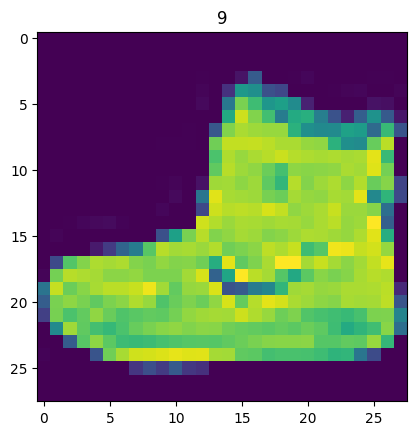

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [11]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [15]:
(next(iter(train_dataloader))[0]).shape

torch.Size([32, 1, 28, 28])

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


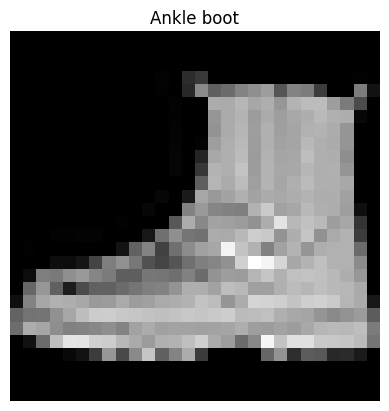

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [57]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {flatten_model(x).shape}")
print(f"Dim after flattening: {flatten_model(x).dim()}")
#flatten_model(x)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])
Dim after flattening: 2


In [30]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [33]:
int(class_names.__len__())

10

In [36]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=int(class_names.__len__()))
model_1.to("cpu")

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [46]:
dummy_x = torch.randn((1, 28, 28))
dummy_x.shape

torch.Size([1, 28, 28])

In [47]:
model_1(dummy_x)

tensor([[ 0.2373, -0.3239, -0.1238,  0.2903,  0.2158,  0.0784, -0.1135, -0.3782,
          0.2640,  0.3665]], grad_fn=<AddmmBackward0>)

In [53]:
model_1(dummy_x).squeeze().__len__()

10

In [58]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0224, -0.0181,  0.0197,  ...,  0.0355, -0.0293, -0.0290],
                      [ 0.0062,  0.0239,  0.0236,  ...,  0.0102, -0.0129,  0.0235],
                      [ 0.0318,  0.0348, -0.0320,  ..., -0.0323, -0.0270, -0.0275],
                      ...,
                      [-0.0201,  0.0322, -0.0096,  ..., -0.0022,  0.0090,  0.0300],
                      [ 0.0132,  0.0252,  0.0189,  ...,  0.0141, -0.0189, -0.0134],
                      [ 0.0170, -0.0218,  0.0071,  ...,  0.0029, -0.0044,  0.0155]])),
             ('layer_stack.1.bias',
              tensor([-0.0296,  0.0081, -0.0277,  0.0282, -0.0141,  0.0073,  0.0024, -0.0142,
                      -0.0048,  0.0340])),
             ('layer_stack.2.weight',
              tensor([[-0.1599, -0.0822,  0.2084,  0.1857,  0.0875, -0.2767, -0.0510, -0.3116,
                       -0.1563, -0.0338],
                      [-0.1195,  0.1298,  0.0032,  0.0622,  0.0927,  0.0763, -0.

In [63]:
model_1.state_dict()["layer_stack.1.weight"].squeeze()[0].__len__()

784

In [68]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [69]:
from helper_functions import accuracy_fn

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.01)

In [74]:
next(model_1.parameters()).squeeze().shape

torch.Size([10, 784])

In [75]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end-start
  print(f"Train tim on: {device} took {total_time:.3f} seconds")
  return total_time

In [76]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train tim on: cpu took 0.000 seconds


2.5639999876148067e-05